The Algorithms that were studied for the same are:
1. Canny Edge Detection Algorithm
2. Sobel Algorithm 
3. Prewitt Algorithm
4. Laplacian Algorithm

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('/content/example4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)

#Sobel Edge Detection Algorithm
The Sobel operator can compute an estimation of the image 
intensity function’s gradient in order to find the edge. If one 
can find the points where the derivative of the image intensity 
function will be maximum, then he can easily find the edge. 
This operator is centered on the principle of image convolution 
with a separable and integer valued filter in both horizontal and 
vertical direction (fig.2) and is therefore relatively inexpensive 
in terms of computations.
In this technique, a 3×3 masks has been used to magnify 
the differences among the points on the opposite side of a 
boundary and eliminate the smooth gray level changes in the 
pixels located on the same sides of a boundary

SobelX - Sobel edge image, with edge enhanced in X-direction

Sobel Y - Sobel edge image, with edge enhanced in Y-direction

Sobel XY - Sobel Edge image, with edge enhanced in XY-direction

(-0.5, 649.5, 487.5, -0.5)

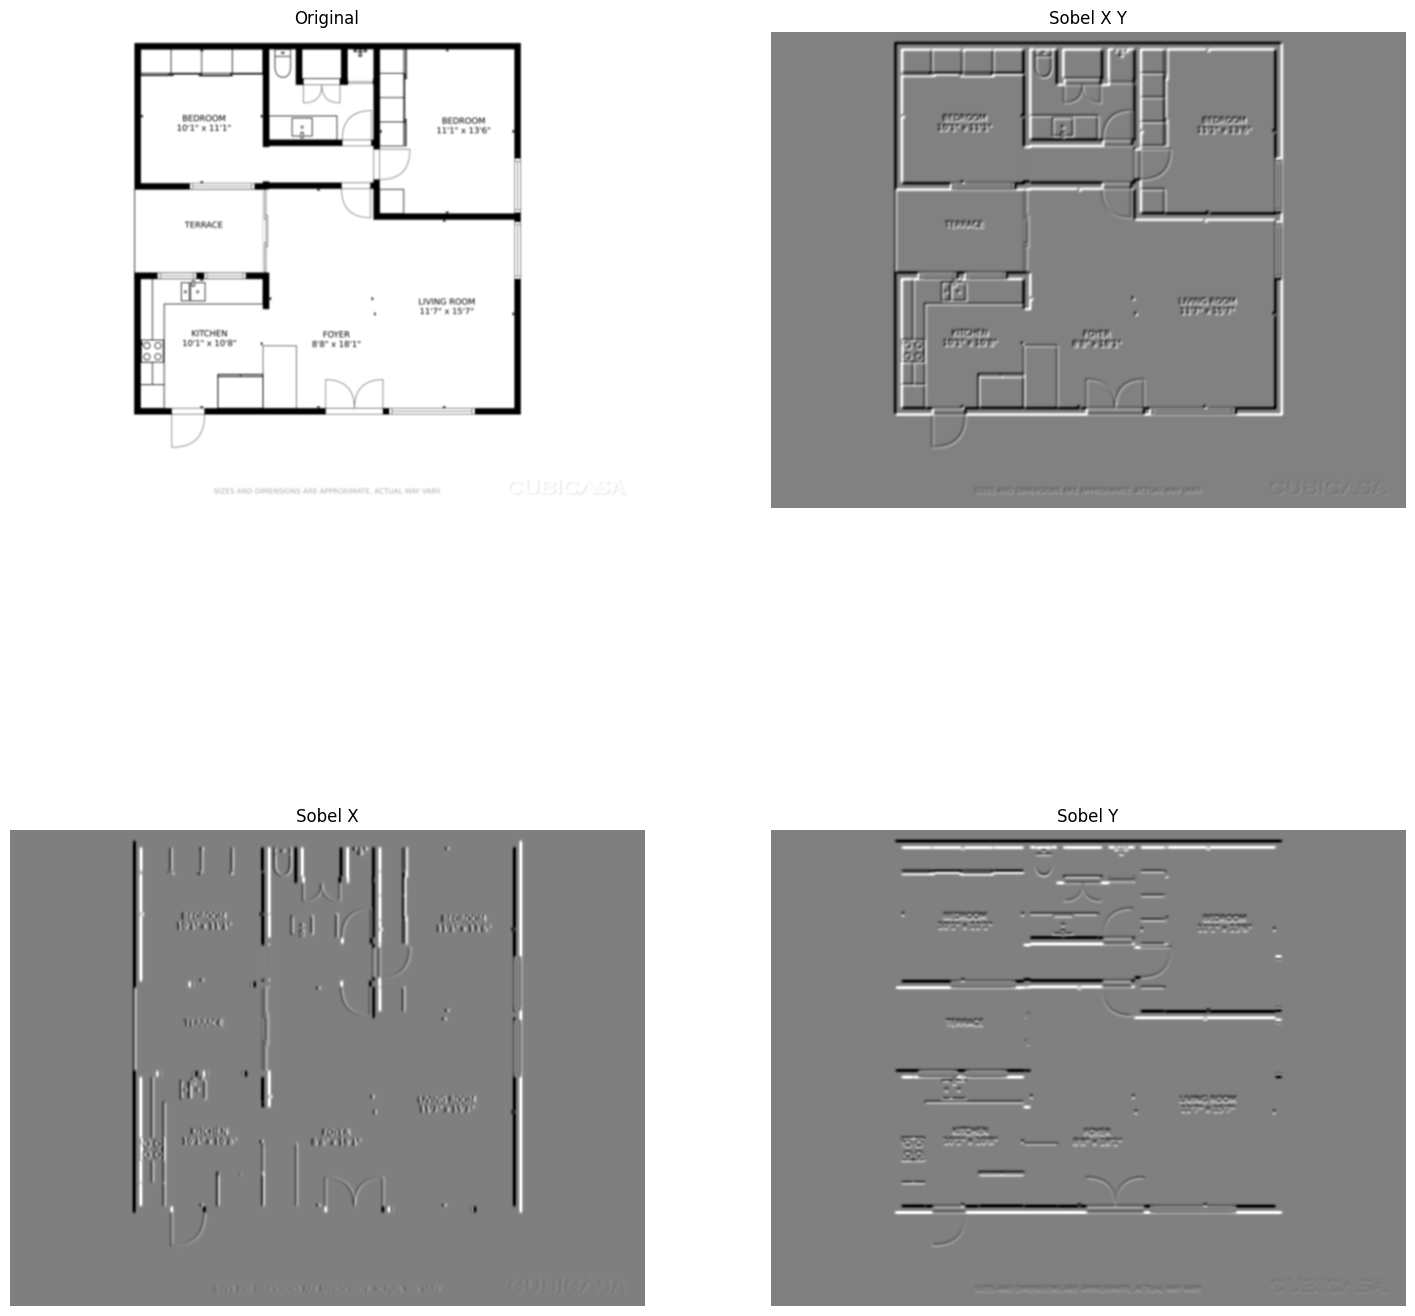

In [ ]:
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

sobelxy = sobelx + sobely

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y') 
plt.axis("off")

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X') 
plt.axis("off")

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

#The major disadvantage of Sobel operator 
#was the signal to noise ratio.
# With the increase in noise the gradient magnitude 
#of the edges also degrades which produces inaccurate results.

#Canny Edge Detection
Canny Edge Detection is one of the most popular edge-detection methods in use today because it is so robust and flexible. The algorithm itself follows a three-stage process for extracting edges from an image. Add to it image blurring, a necessary preprocessing step to reduce noise. This makes it a four-stage process, which includes:

1. Noise Reduction - In Canny Edge Detection, a Gaussian blur filter is used to essentially remove or minimize unnecessary detail that could lead to undesirable edges.
2. Calculating the Intensity Gradient of the Image - Once the image has been smoothed (blurred), it is filtered with a Sobel kernel, both horizontally and vertically. The results from these filtering operations are then used to calculate both the intensity gradient magnitude (G), and the direction (\Theta) for each pixel
3. Suppression of False Edges - After reducing noise and calculating the intensity gradient, the algorithm in this step uses a technique called non-maximum suppression of edges to filter out unwanted pixels 
4. Hysteresis Thresholding - In this final step of Canny Edge Detection, the gradient magnitudes are compared with two threshold values, one smaller than the other. 

If the gradient magnitude value is higher than the larger threshold value, those pixels are associated with solid edges and are included in the final edge map. If the gradient magnitude values are lower than the smaller threshold value, the pixels are suppressed and excluded from the final edge map.
All the other pixels, whose gradient magnitudes fall between these two thresholds, are marked as ‘weak’ edges (i.e. they become candidates for being included in the final edge map). 
If the ‘weak’ pixels are connected to those associated with solid edges, they are also included in the final edge map. 

'Canny Edge Detection algorithm is computationally more expensive \ncompared to Sobel, Prewitt and Laplacian operator. However, the Canny’s edge detection \nalgorithm performs better than all these operators under almost all scenarios, \neven under noisy conditions.'

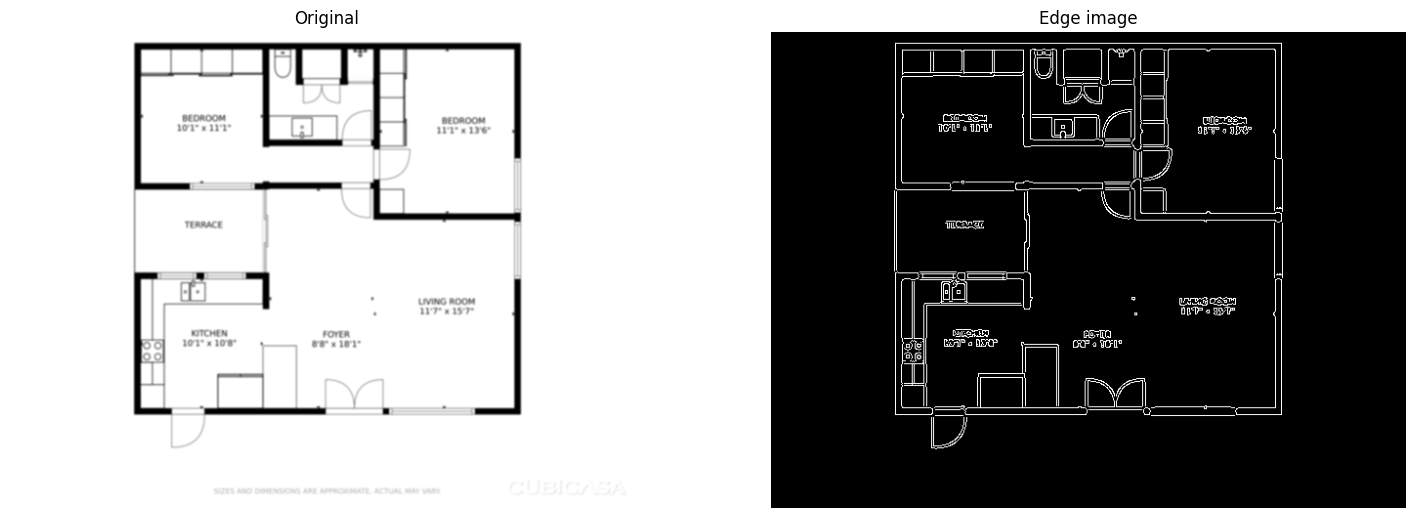

In [ ]:
edges = cv2.Canny(image=img, threshold1=100, threshold2=200)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.axis("off")

'''Canny Edge Detection algorithm is computationally more expensive 
compared to Sobel, Prewitt and Laplacian operator. However, the Canny’s edge detection 
algorithm performs better than all these operators under almost all scenarios, 
even under noisy conditions.'''

#Prewitt Edge Detection
Mathematically it can be elucidated as a discontinuous
differentiation operator. An approximation of the gradient of 
the image intensity function is computed by this operator. At 
each point in the image matrix, the outcome of the Prewitt 
operator is the corresponding gradient vector or the 
normalization of this vector [8].
The operator uses two 3×3 kernels. These kernels are 
convolved with the original image to calculate estimates of the 
derivatives - one for horizontal changes, and one for vertical. If 
we define A as the input image, and Hx and Hy are two images 
which at each point contain the horizontal and vertical 
derivative approximations


Prewitt operator works well for digital image corrupted 
with Poisson noise whereas its performance decreases with 
other type of noise. But it has low computational cost

Original: 


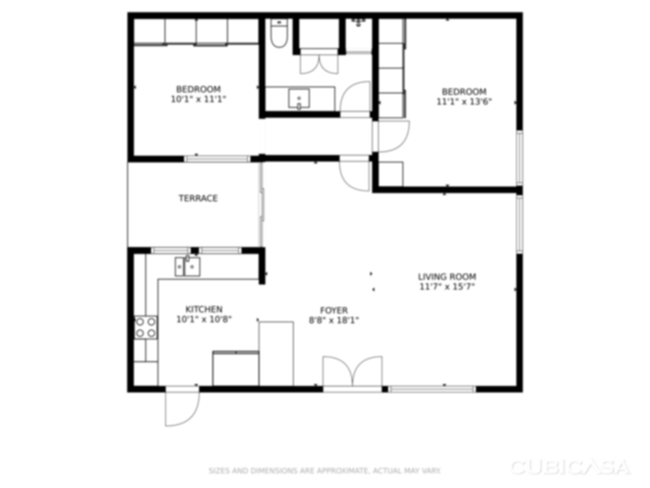

Prewitt X: 


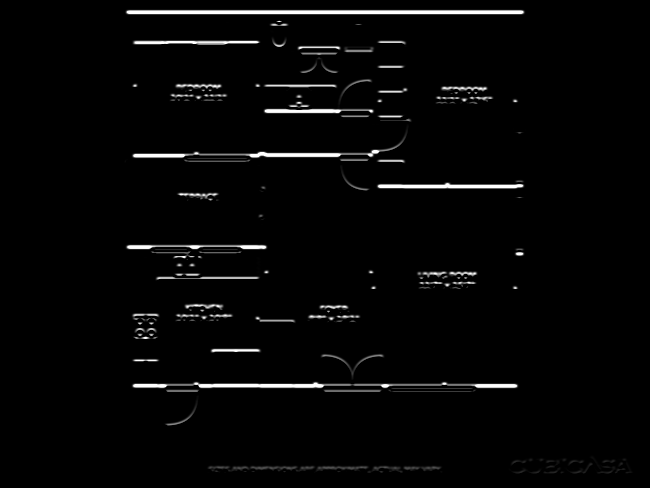

Prewitt Y: 


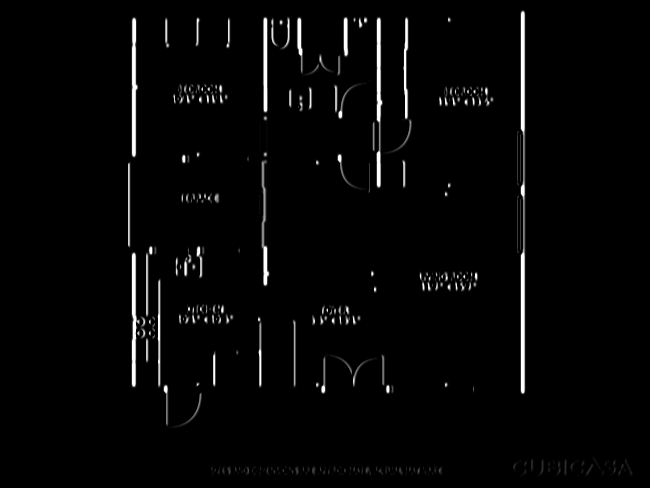

Prewitt XY: 


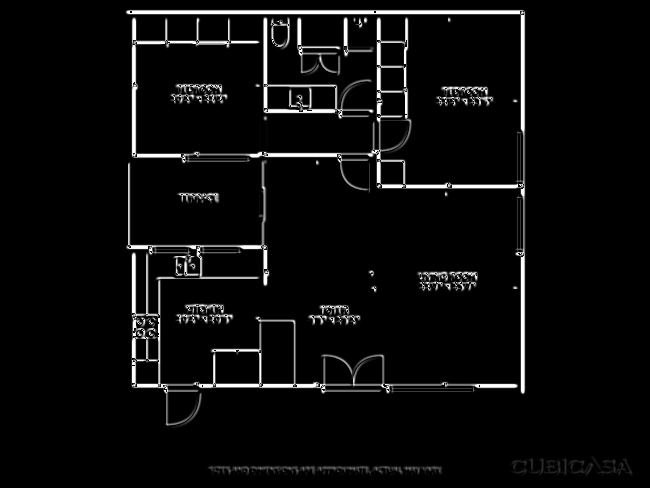

' prewitt operator accuracy suffers as the magnitude of the edges decreases. \nOverall, the prewitt method cannot produce accurate edge detec- tion with thin and smooth edge.'

In [ ]:
from google.colab.patches import cv2_imshow
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)

print("Original: ")
cv2_imshow(img)
print("Prewitt X: ")
cv2_imshow(img_prewittx)
print("Prewitt Y: ")
cv2_imshow(img_prewitty)
print("Prewitt XY: ")
cv2_imshow(img_prewittx + img_prewitty)

''' prewitt operator accuracy suffers as the magnitude of the edges decreases. 
Overall, the prewitt method cannot produce accurate edge detec- tion with thin and smooth edge.'''

#Laplacian Algorithm for Edge Detection
Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass. Hence, it is very sensitive to noise. Thus if an image contains noise, the laplacian gives very large values and also ruins the image in the process

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

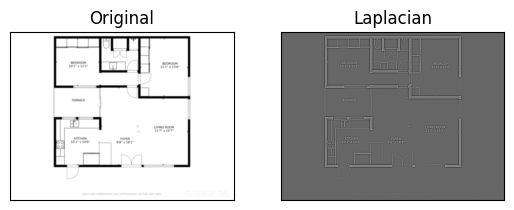

In [ ]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

#Evaluation
a. based on visual inspection
b. Number of False Edges ( A low number of false edges means a good edge detection method)

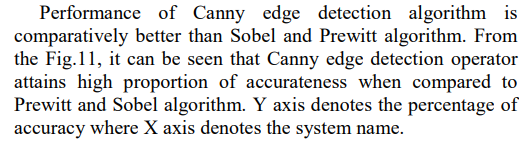

Accuracy:
Canny - 91.56%
Laplacian - 78%
Sobel - 79.4%
Prewitt - 76.1%


[Text(0, 0, '79.4'),
 Text(0, 0, '91.6'),
 Text(0, 0, '76.1'),
 Text(0, 0, '78.0')]

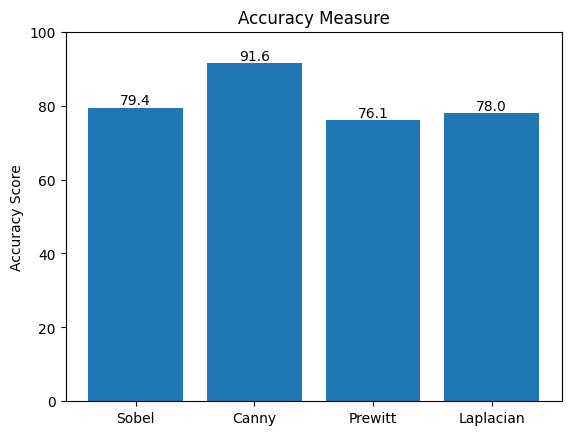

In [ ]:
import matplotlib.pyplot as plt

left = [1, 2, 3, 4]

# heights of bars
height = [79.4, 91.56, 76.1, 78]

# labels for bars
algo_names = ['Sobel', 'Canny', 'Prewitt', 'Laplacian']
algo_acc = [79.4, 91.56,76.1,78]
# plotting a bar chart
fig, ax = plt.subplots()
bar_container = ax.bar(algo_names, algo_acc)
ax.set(ylabel='Accuracy Score', title='Accuracy Measure', ylim=(0, 100))
ax.bar_label(bar_container, fmt='{:,.1f}')